In [68]:
import numpy as np
import regex as re
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
with open('./sentences.txt', 'r') as f:
    func = lambda x: re.split('[^a-z]', x.rstrip("\n").lower())
    text = [[*filter(lambda x: x != "", func(x))] for x in f]

In [5]:
voc = []
for sentence in text:
    for word in sentence:
        if word not in voc:
            voc.append(word)

In [6]:
voc = {x: i for i, x in enumerate(voc)}

In [7]:
def text_to_vect(sentence):
    vect = []
    for word in sentence:
        vect.append(voc[word])
    return vect

In [8]:
vect_text = []
for sentence in text:
    vect_text.append(text_to_vect(sentence))

In [19]:
a = 0
for sentence in vect_text:
    if np.array(sentence).max() > a:
        a = np.array(sentence).max()
print(len(vect_text), a)

22 253


In [25]:
matrix_d = np.zeros((len(vect_text), a + 1))

In [26]:
for i, sentence in enumerate(vect_text):
    matrix_d[i][sentence] = 1

In [28]:
matrix_d.shape

(22, 254)

In [36]:
from scipy.spatial.distance import cosine

In [66]:
a_0 = 1
a_1 = 1
i_f_0 = None
for i, row in enumerate(matrix_d[1:]):
    if cosine(matrix_d[0], row) < a_0:
        a_0 = cosine(matrix_d[0], row)
        i_f_0 = i
for i, row in enumerate(matrix_d[1:]):
    if cosine(matrix_d[0], row) < a_1 and i_f_0 != i:
        a_1 = cosine(matrix_d[0], row)
        i_f_1 = i
print(i_f_0, i_f_1, a_0, a_1)
with open("submission-1.txt", "w") as f:
    f.write(str(i_f_0) + " " + str(i_f_1))

5 3 0.7547442642060137 0.8055388829343507


In [60]:
(" ".join(text[5]), " ".join(text[3]), " ".join(text[0]))

('the domesticated cat and its closest wild ancestor are both diploid organisms that possess chromosomes and roughly genes',
 'cats can hear sounds too faint or too high in frequency for human ears such as those made by mice and other small animals',
 'in comparison to dogs cats have not undergone major changes during the domestication process')

## P_2

In [78]:
def func(x): return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [140]:
x_line = np.linspace(1, 15, 50)

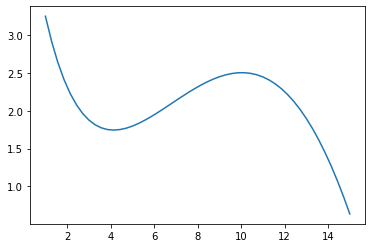

In [79]:
plt.plot(x, func(x))

In [110]:
x = x[:, np.newaxis] + np.zeros(49)

In [127]:
A[2]

array([1.        , 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857,
       1.57142857, 1.57142857, 1.57142857, 1.57142857, 1.57142857])

In [125]:
A = np.hstack((np.ones(50).reshape(-1, 1), x))

In [100]:
b = func(x[:, 1])

In [101]:
from scipy.linalg import solve

In [136]:
solve(A, b)

LinAlgError: Matrix is singular.

In [155]:
A_0 = np.array([[1, 1, 1, 1], [1, 4, 4 ** 2, 4 ** 3], [1, 10, 10 ** 2, 10 ** 3], [1, 15, 15 ** 2, 15 ** 3]])
B_0 = np.array([func(1), func(4), func(10), func(15)])

In [157]:
w_0, w_1, w_2, w_3 = solve(A_0, B_0)

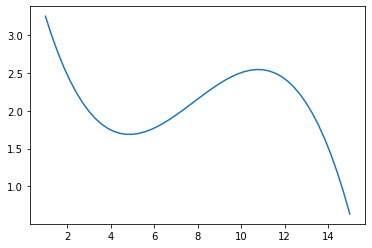

In [158]:
plt.plot(x_line, w_0 + w_1 * x_line + w_2 * x_line ** 2 + w_3 * x_line ** 3)

In [167]:
with open("submission-2.txt", "w") as f:
    f.write(" ".join(str(x) for x in [w_0, w_1, w_2, w_3]))

In [163]:
[w_0, w_1, w_2, w_3]

[4.362641535118072,
 -1.2955258656948434,
 0.1933368470215116,
 -0.008235651173320554]

'4.362641535118072 -1.2955258656948434 0.1933368470215116 -0.008235651173320554'

In [165]:
type(w_0)

numpy.float64